##データセット作成

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import timedelta
from pathlib import Path


p = Path("/content/drive/Othercomputers/MyPC/Desktop/customers")
print(p)
file_name = '*.CSV'
csv_files = p.glob(file_name)
print(csv_files)
df = pd.DataFrame()

for i in csv_files:
    tmp_df = pd.read_csv(i,encoding='shift_jis')
    # DataFrameを連結する
    df = pd.concat([df, tmp_df])

df["日付"] = pd.to_datetime(df["日付"])
#データを日付順にソート
df = df.sort_values("日付",ascending=True).reset_index(drop=True)
print(df.head())
print(df.tail())

In [ ]:
df_ = df.set_index('日付')  # datetimeをindexに指定
df_ = df_.asfreq(freq='D')
df_fill = df_.reset_index()  # indexを元に戻す

na_row = df_fill.isnull().any(axis=1)
df_fill.loc[na_row,:]

df = df_fill

df = df.set_axis(['date','weekday',"7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","0","1","2","3","4","5","6"], axis=1)
df = df.drop(["7","0","1","2","3","4","5","6"],axis=1)
print(df.head(3))

In [ ]:
datalist = []
timelist = []
dt = timedelta(hours=1)

for i in range(0,len(df)):
    datalist = np.append(datalist,df.iloc[i,2:].values) #データリスト
    date_list = [df.iloc[i,0] + dt*8 + timedelta(hours=k) for k in range(16)]
    date_list = np.array(date_list)
    timelist = np.append(timelist,date_list) #時間リスト
print(len(datalist),len(timelist))

df_date = pd.DataFrame(np.array([timelist,datalist]).T,columns=["datetime","customers"])
print(df_date.head())

df = df.set_index('datetime')
df_date.info()

#ここ以前で作成したデータフレームを保存
#df_date.to_csv("customers.csv",index=False)

In [ ]:
#コロナ感染者数csv作成
covid19 =  pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/newly_confirmed_cases_daily.csv")
covid19 = covid19["Wakayama"]
covid19 = covid19[:960]

num = len(mydf)-15360
tmp = [0]*num
for j in range(0,len(covid19)):
    for i in range(0,16):
        tmp = np.append(tmp, covid19.iloc[j])
covid19 = tmp

In [ ]:
#降水量
import os
import glob
import pandas as pd
from datetime import timedelta
from pathlib import Path

p = Path("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/rain")
print(p)
file_name = '*.csv'
csv_files = p.glob(file_name)
print(csv_files)
df = pd.DataFrame()

for i in csv_files:
    tmp_df = pd.read_csv(i,encoding='shift_jis')
    # DataFrameを連結する
    df = pd.concat([df, tmp_df])

df = df.rename(columns = {"年月日時":"date","降水量(mm)" :"precipitation"})
df["date"] = pd.to_datetime(df["date"])
#データを日付順にソート
df = df.sort_values("date",ascending=True).reset_index(drop=True)
print(df.head())
print(df.tail())

df = df.drop("date", axis=1)
#作成したデータフレームを保存
rain = df
rain.to_csv("rain.csv",index=False)

In [ ]:
emergency = pd.DataFrame()
emergency.index = mydf.index
emergency["emergency"] = 0
emergency["2020-04-08":"2020-05-24"] = 1
emergency["2021-01-14":"2021-02-28"] = 1
emergency["2021-04-25":"2021-05-31"] = 1
#emergency["2021-08-02":"2021-09-30"] = 1 #大阪
emergency["2022-01-25":"2022-03-06"] = 1
print(emergency["2020-04-08":"2020-05-25"].tail(20))
emergency.to_csv("emergency.csv",index=False)

                     emergency
date                          
2020-05-24 20:00:00          1
2020-05-24 21:00:00          1
2020-05-24 22:00:00          1
2020-05-24 23:00:00          1
2020-05-25 08:00:00          0
2020-05-25 09:00:00          0
2020-05-25 10:00:00          0
2020-05-25 11:00:00          0
2020-05-25 12:00:00          0
2020-05-25 13:00:00          0
2020-05-25 14:00:00          0
2020-05-25 15:00:00          0
2020-05-25 16:00:00          0
2020-05-25 17:00:00          0
2020-05-25 18:00:00          0
2020-05-25 19:00:00          0
2020-05-25 20:00:00          0
2020-05-25 21:00:00          0
2020-05-25 22:00:00          0
2020-05-25 23:00:00          0


In [ ]:
h = pd.DataFrame()
h.index = mydf.index
h["holiday"] = 0
#2019
h["2019-04-27":"2019-05-06"] = 1 #GW
#2020
h["2020-05-02":"2020-05-06"] = 1 #GW
#2021
h["2021-05-01":"2021-05-05"] = 1 #GW
#2022
h["2022-04-29":"2022-05-01"] = 1 #GW
h["2022-05-03":"2022-05-05"] = 1 #GW

#2019
h["2019-08-10":"2019-08-18"] = 1
#2020
h["2020-08-08":"2020-08-10"] = 1
h["2020-08-13":"2020-08-16"] = 1
#2021
h["2021-08-07":"2021-08-09"] = 1
h["2021-08-13":"2021-08-16"] = 1
#2022
h["2022-08-06":"2022-08-07"] = 1
h["2022-08-11":"2022-08-16"] = 1

#2019
h["2019-01-01":"2019-01-05"] = 1
h["2019-12-28":"2019-12-31 14:00"] = 1
#2020
h["2020-01-01":"2020-01-05"] = 1
h["2020-12-28":"2020-12-31 14:00"] = 1
#2021
h["2021-01-01":"2021-01-05"] = 1
h["2021-12-28":"2021-12-31 14:00"] = 1
#2022
h["2022-01-01":"2022-01-05"] = 1

#2019
h["2019-02-11"] = 1
h["2019-03-21"] = 1
h["2019-07-15"] = 1
h["2019-09-16"] = 1
h["2019-09-23"] = 1
h["2019-10-14"] = 1
h["2019-10-22"] = 1
h["2019-11-04"] = 1
h["2021-12-24":"2019-12-25"] = 1
#2020
h["2020-01-13"] = 1
h["2020-02-11"] = 1
h["2020-02-24"] = 1
h["2020-03-20"] = 1
h["2020-04-29"] = 1
h["2020-07-23":"2020-07-24"] = 1
h["2020-09-21":"2020-09-22"] = 1
h["2020-11-03"] = 1
h["2020-11-23"] = 1
h["2020-12-24":"2020-12-25"] = 1

#2021
h["2021-01-11"] = 1
h["2021-02-11"] = 1
h["2021-04-29"] = 1
h["2021-07-22":"2021-07-23"] = 1
h["2021-09-20"] = 1
h["2021-09-23"] = 1
h["2021-11-03"] = 1
h["2021-11-23"] = 1
h["2021-12-24":"2021-12-25"] = 1
#2022
h["2022-01-01":"2022-01-05"] = 1
h["2022-01-10"] = 1
h["2022-02-11"] = 1
h["2022-02-23"] = 1
h["2022-03-21"] = 1
h["2022-07-18"] = 1
h.to_csv("holiday_all.csv",index=False)

In [ ]:
GW = pd.DataFrame()
GW.index = mydf.index
GW["GW"] = 0
#2019
GW["2019-04-27":"2019-05-06"] = 1 #GW
#2020
GW["2020-05-02":"2020-05-06"] = 1 #GW
#2021
GW["2021-05-01":"2021-05-05"] = 1 #GW
#2022
GW["2022-04-29":"2022-05-01"] = 1 #GW
GW["2022-05-03":"2022-05-05"] = 1 #GW
GW.to_csv("GW.csv",index=False)

In [ ]:
BB = pd.DataFrame()
BB.index = mydf.index
BB["BB"] = 0
#2019
BB["2019-08-10":"2019-08-18"] = 1
#2020
BB["2020-08-08":"2020-08-10"] = 1
BB["2020-08-13":"2020-08-16"] = 1
#2021
BB["2021-08-07":"2021-08-09"] = 1
BB["2021-08-13":"2021-08-16"] = 1
#2022
BB["2022-08-06":"2022-08-07"] = 1
BB["2022-08-11":"2022-08-16"] = 1
BB.to_csv("BB.csv",index=False)

In [ ]:
NY = pd.DataFrame()
NY.index = mydf.index
NY["NY"] = 0
#2019
NY["2019-01-01":"2019-01-05"] = 1
NY["2019-12-28":"2019-12-31 14:00"] = 1
#2020
NY["2020-01-01":"2020-01-05"] = 1
NY["2020-12-28":"2020-12-31 14:00"] = 1
#2021
NY["2021-01-01":"2021-01-05"] = 1
NY["2021-12-28":"2021-12-31 14:00"] = 1
#2022
NY["2022-01-01":"2022-01-05"] = 1
NY.to_csv("NY.csv",index=False)

In [ ]:
holiday = pd.DataFrame()
holiday.index = mydf.index
holiday["holiday"] = 0
#2019
holiday["2019-02-11"] = 1
holiday["2019-03-21"] = 1
holiday["2019-07-15"] = 1
holiday["2019-09-16"] = 1
holiday["2019-09-23"] = 1
holiday["2019-10-14"] = 1
holiday["2019-10-22"] = 1
holiday["2019-11-04"] = 1
#2020
holiday["2020-01-13"] = 1
holiday["2020-02-11"] = 1
holiday["2020-02-24"] = 1
holiday["2020-03-20"] = 1
holiday["2020-04-29"] = 1
holiday["2020-07-23":"2020-07-24"] = 1
holiday["2020-09-21":"2020-09-22"] = 1
holiday["2020-11-03"] = 1
holiday["2020-11-23"] = 1
#2021
holiday["2021-01-11"] = 1
holiday["2021-02-11"] = 1
holiday["2021-04-29"] = 1
holiday["2021-07-22":"2021-07-23"] = 1
holiday["2021-09-20"] = 1
holiday["2021-09-23"] = 1
holiday["2021-11-03"] = 1
holiday["2021-11-23"] = 1
#2022
holiday["2022-01-10"] = 1
holiday["2022-02-11"] = 1
holiday["2022-02-23"] = 1
holiday["2022-03-21"] = 1
holiday["2022-07-18"] = 1
holiday.to_csv("holiday_new.csv",index=False)

In [ ]:
school = pd.DataFrame()
school.index = mydf.index
school["school"] = 0
#2019
school["2019-03-18 10:00:00":"2019-03-18 14:00"] = 1
school["2019-04-09 10:00:00":"2019-04-09 14:00:00"] = 1
#2020
school["2020-03-23 10:00:00":"2020-03-23 14:00:00"] = 1
school["2020-04-09 10:00:00":"2020-04-09 14:00:00"] = 1
#2021
school["2021-03-18 10:00:00":"2021-03-18 14:00"] = 1
school["2021-04-9 10:00:00":"2021-4-09 14:00"] = 1
#2022
school["2022-03-18 10:00:00":"2022-03-18 14:00:00"] = 1
school["2022-04-11 10:00:00":"2022-04-11 14:00:00"] = 1
school.to_csv("school.csv",index=False)

In [ ]:
Christmas = pd.DataFrame()
Christmas.index = mydf.index
Christmas["Christmas"] = 0
#2019
Christmas["2019-12-24":"2019-12-25"] = 1
#2020
Christmas["2020-12-24":"2020-12-25"] = 1
#2021
Christmas["2021-12-24":"2021-12-25"] = 1
#2022
Christmas["2022-12-25":"2022-12-25"] = 1
Christmas.to_csv("Christmas.csv",index=False)

##成分調査

Text(0, 0.5, 'cos')

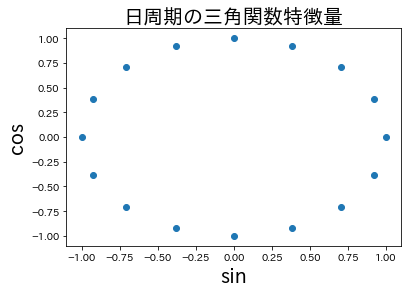

In [ ]:
sin = df.sin16_1[:16]
cos = df.cos16_1[:16]
plt.scatter(sin, cos)
plt.title("日周期の三角関数特徴量",fontsize=20)
plt.xlabel("sin",fontsize=20,fontname='IPAexGothic')
plt.ylabel("cos",fontsize=20,fontname='IPAexGothic')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(mydf_e.customers)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -16.709347
p-value: 0.000000
Critical values :
	 1% -3.4306559402820924
	 5% -2.861675215331944
	 10% -2.5668419713431683


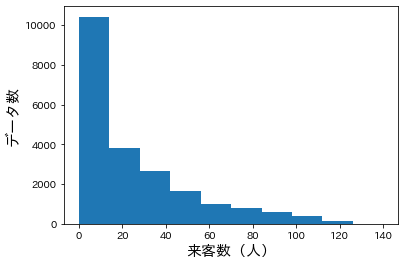

In [ ]:
plt.hist(mydf.customers)
plt.xlabel("来客数（人）",size=15, fontname='IPAexGothic')
plt.ylabel("データ数",size=15, fontname='IPAexGothic')
plt.show()

In [ ]:
#来客数可視化
fig, ax = plt.subplots(figsize = (100,10))
ax.plot(tra_df.index, tra_df.customers, label="actual(train dataset)")
ax.plot(eval_df.index, eval_df.customers, label="actual(test dataset)")
plt.legend()

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib
japanize_matplotlib.japanize()

In [ ]:
#その他可視化
x = mydf[mydf.index <= "2019-1-8"]
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x.index, x.customers)
plt.rcParams["font.family"] = "IPAexGothic"
ax.set_xlabel('日時（h）', fontsize = 18)
ax.set_ylabel('来客数（人）', fontsize = 18)
#ax.plot(eval_df.index, eval_df.precipitation, label="actual(test dataset)")
#plt.xlabel("日時（h）",size=25, fontname='IPAexGothic')
#plt.ylabel("来客数（人）",size=25, fontname='IPAexGothic')
plt.legend()

In [ ]:
#コレログラムの作成
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (20, 5)
#横軸にラグ、縦軸に自己相関
plot_acf(tra_e['customers'], lags=35)
plt.xlabel("ラグ",size=30, fontname='IPAexGothic')
plt.ylabel("自己相関係数",size=30, fontname='IPAexGothic')
#偏自己相関グラフ
#plot_pacf(mydf['customers'], lags=30)
plt.show()

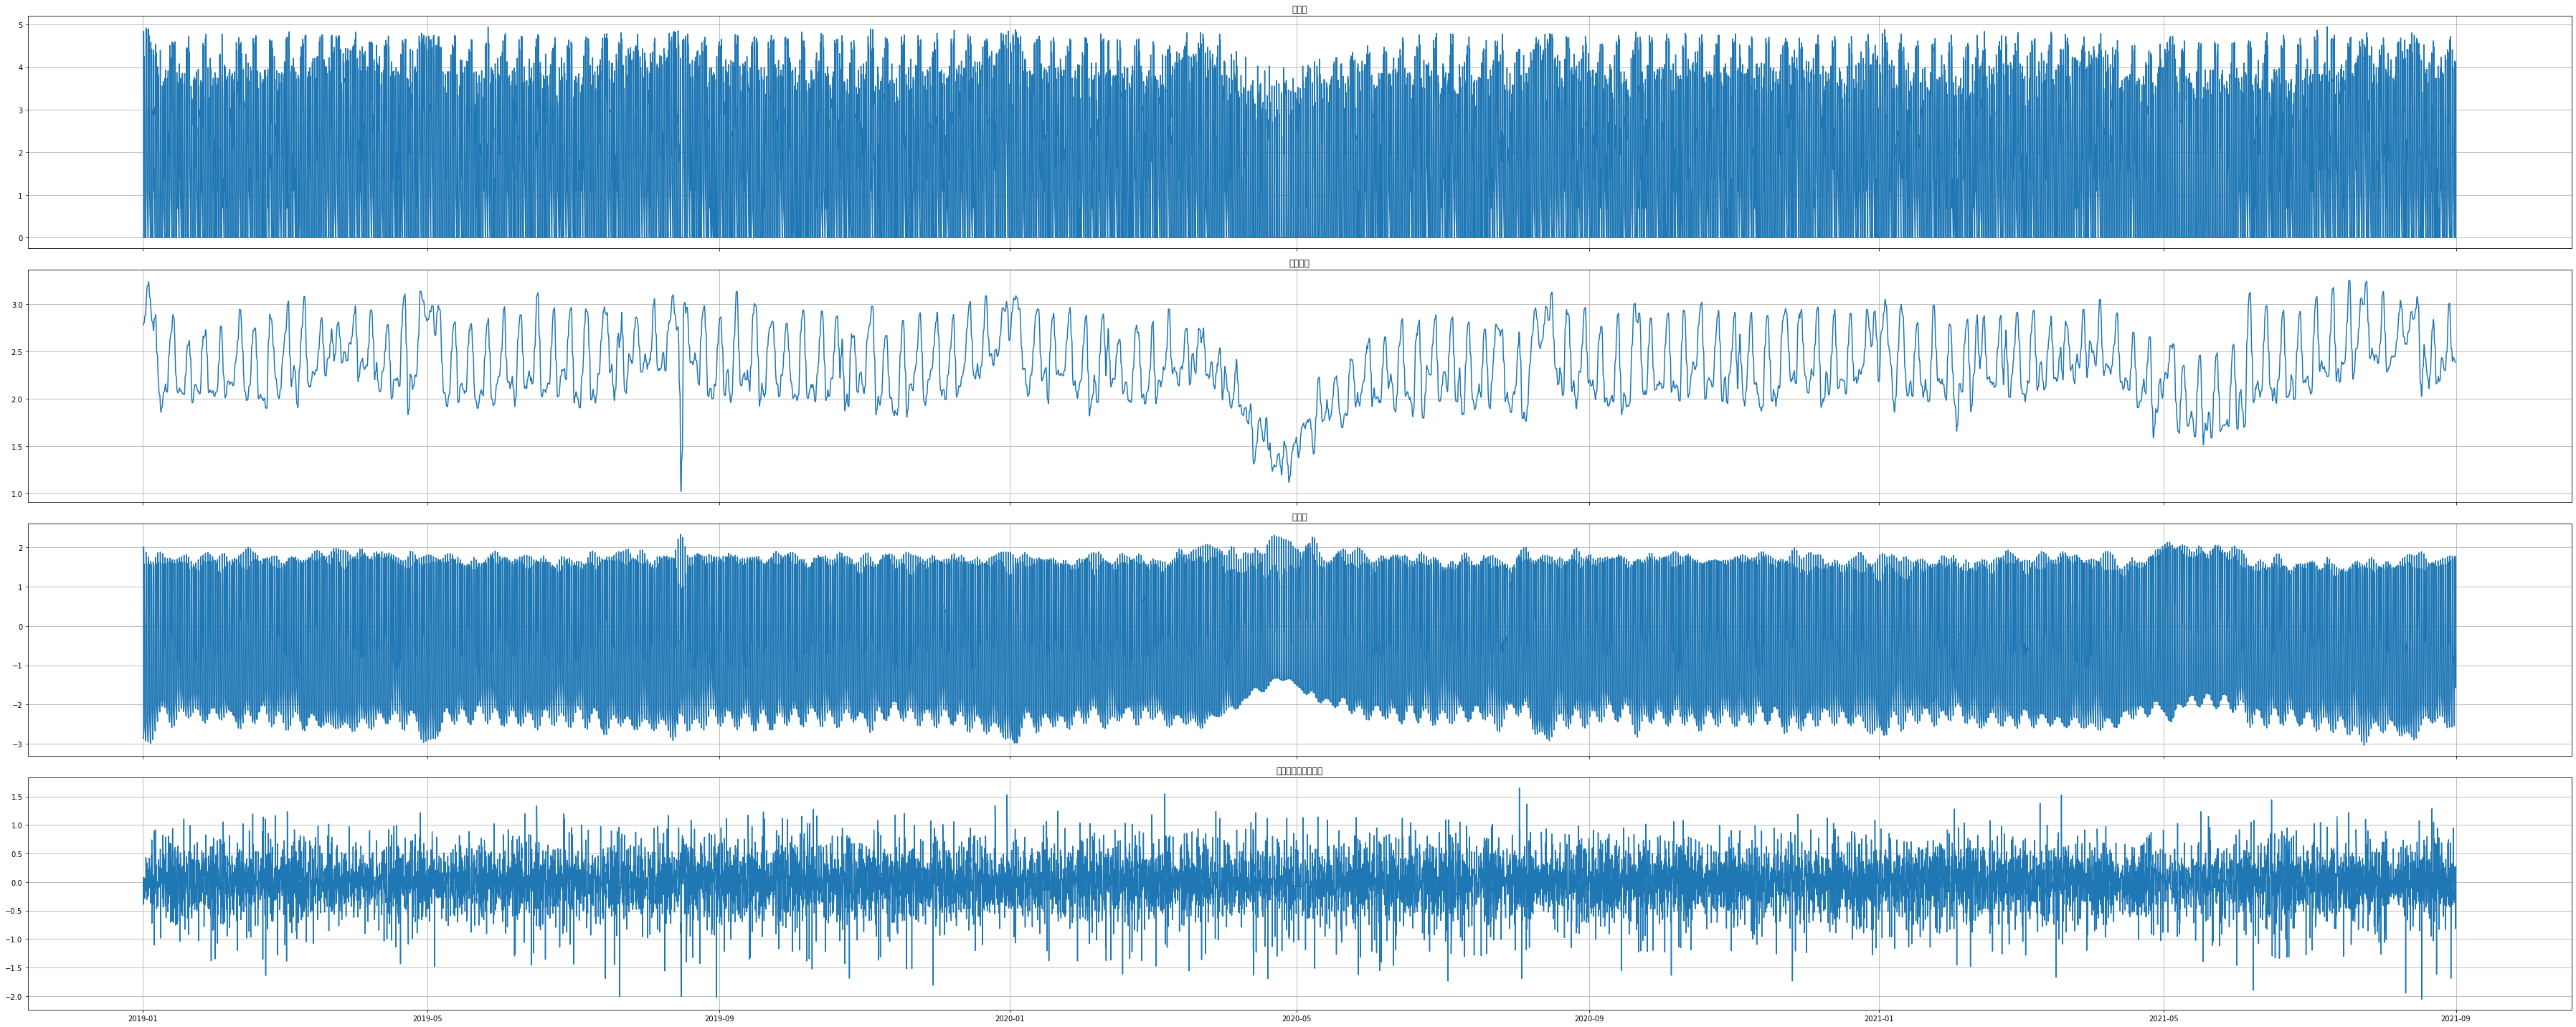

In [ ]:
#STL分解

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
#from statsmodels.tsa.seasonal import MSTL

period = 16
stl = STL(tra_e.customers, period=period)
dr = stl.fit()

_, axes = plt.subplots(figsize=(50, 20), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(dr.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(dr.trend)
axes[1].grid()

axes[2].set_title("季節性")
axes[2].plot(dr.seasonal)
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(dr.resid)
axes[3].grid()

plt.tight_layout()
plt.show()

In [ ]:
#STL分解（2回目）
trend = pd.DataFrame(dr.trend)
trend.columns = ["customers"]

period = 16*7
stl = STL(trend.customers, period=period)
dr = stl.fit()

_, axes = plt.subplots(figsize=(50, 20), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(dr.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(dr.trend)
axes[1].grid()

axes[2].set_title("季節性")
axes[2].plot(dr.seasonal)
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(dr.resid)
axes[3].grid()

plt.tight_layout()
plt.show()

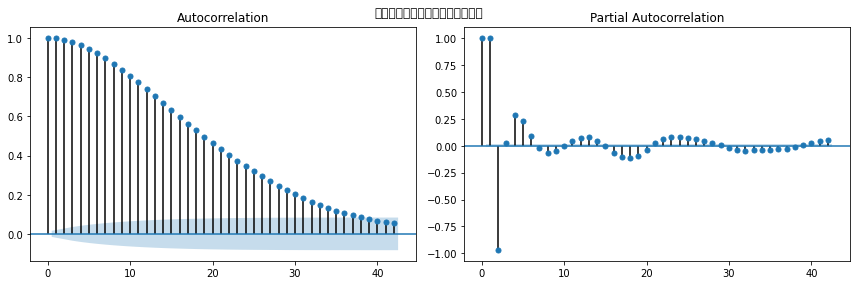

In [ ]:
#トレンドと残差の自己相関を確認
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle("トレンドの自己相関・偏自己相関")
plot_acf(dr.trend, ax=axes[0]) #1日毎の周期性しか取り出していないため、トレンドに周期性が残ってしまっている。
plot_pacf(dr.trend, method="ywm", ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
trend = dr.trend + dr.resid
trend = pd.DataFrame(trend)
trend.columns = ["customers"]
tra_df = trend
print(tra_df)

In [ ]:
trainY = tra_e.customers
trainX = tra_e.drop("customers", axis = 1)

testY = eval_e.customers
testX = eval_e.drop("customers",axis = 1)

print(trainX.head(2))
print(testY.head(2))
#print(testX.shape)
#print(testY.shape)

In [ ]:
#Lag Features
lag_day,lag_week = pd.Series(mydf['customers'].shift(16), name = "ylag16"), pd.Series(mydf['customers'].shift(7*16), name = 'ylag_week')
#ylag_month = pd.Series(mydf['customers'].shift(30*16), name = "ylag_month")
#tra_lag = pd.concat([mydf,lag_day], axis = 1)
tra_lag = pd.concat([mydf,lag_week], axis = 1)
tra_lag = tra_lag.dropna()
mydf = tra_lag

##実験

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib
japanize_matplotlib.japanize()

In [ ]:
mydf.tail(4)

,customers,precipitation,emergency,holiday,BB,NY,GW,school,infected,sin16_1,...,cos112_7,sin112_8,cos112_8,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,
2022-08-31 20:00:00,27.0,0.0,0,0,0,0,0,0,1031,-1.000000,...,-6.138926e-13,-7.015916e-13,1.000000,0,0,0,0,0,0,1
2022-08-31 21:00:00,7.0,0.0,0,0,0,0,0,0,1031,-0.923880,...,3.826834e-01,4.338837e-01,0.900969,0,0,0,0,0,0,1
2022-08-31 22:00:00,2.0,0.0,0,0,0,0,0,0,1031,-0.707107,...,7.071068e-01,7.818315e-01,0.623490,0,0,0,0,0,0,1
2022-08-31 23:00:00,2.0,4.0,0,0,0,0,0,0,1031,-0.382683,...,9.238795e-01,9.749279e-01,0.222521,0,0,0,0,0,0,1


In [ ]:
import statsmodels.api as sm
import os
import glob
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import statsmodels.api as sm
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler #最小値を0、最大値を1にする正規化
from pathlib import Path

df = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/customers.csv",encoding='shift_jis')
df["date"] = pd.to_datetime(df["date"]) #dateをdatetime型に変更
df.customers[df.date == "2021-11-23 21:00:00"] = 10 #来客数1000人の記入ミスを修正
#曜日を追加するための関数を定義
def get_weekday(data):
    w_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return(w_list[data.weekday()])
df["weekday"] = df["date"].apply(get_weekday) #曜日を追加

#欠損値を埋める
df["customers"].iloc[16108:16240] = df["customers"].iloc[15660:15792]

rain = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/rain.csv")
rain = rain.drop("date", axis=1)
df = pd.concat([df,rain], axis = 1)

emergency = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/emergency.csv")
df = pd.concat([df,emergency], axis = 1)
holiday = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/holiday_new.csv")
df = pd.concat([df,holiday], axis = 1)
BB = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/BB.csv")
df = pd.concat([df,BB], axis = 1)
NY = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/NY.csv")
df = pd.concat([df,NY], axis = 1)
GW = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/GW.csv")
df = pd.concat([df,GW], axis = 1)
school = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/school.csv")
df = pd.concat([df,school], axis = 1)
Christmas = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/Christmas.csv")
df = pd.concat([df,Christmas], axis = 1)

covid19 =  pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/covid19.csv")
#covid19.infected.iloc[:] = covid19.infected.iloc[:]+1
#df = pd.concat([df,covid19], axis = 1)

# 説明変数X（Fourier terms）の生成
def fourier_terms(seasonal,num,df):
    fourier = pd.DataFrame()
    fourier.index = df.index
    for i in range(num):
        i += 1
        sin_name = "sin" + str(seasonal) + "_" + str(i)
        cos_name = "cos" + str(seasonal) + "_" + str(i)
        ## n周期のFourier terms
        fourier[sin_name] = np.sin(i * 2 * np.pi * fourier.index / seasonal)
        fourier[cos_name] = np.cos(i * 2 * np.pi * fourier.index / seasonal)
        df = pd.concat([df,fourier[sin_name],fourier[cos_name]],axis=1)
    return df
df = fourier_terms(16,8,df) #ARIMA=8. LightGBM=20
df = fourier_terms(16*7,8,df) #ARIMA=8,LightGBM=10
df = fourier_terms(16*365,10,df)
df = df.drop(["sin112_3","cos112_3","sin112_6","cos112_6"],axis=1) #SARIMAのみ



mydf = df.set_index('date') #インデックスをdateに変更

#感染者数（倍率）
#for i in range(0,len(covid19) - 16):
#    mydf.infected.iloc[i+16] = covid19.infected.iloc[i+16]/covid19.infected.iloc[i]
#mydf.infected = mydf.infected*mydf.emergency
#mydf.infected[mydf.index <= "2020-02-12 23:00:00"] = 0
#mydf = mydf.drop("emergency",axis=1)

#曜日
mydf = pd.get_dummies(mydf) #カテゴリ変数をダミー変数化（曜日）
#mydf.holiday = mydf.holiday + mydf.weekday_Saturday + mydf.weekday_Sunday

#mydf["2022-1-1"].weekday_Saturday=0
#mydf["2022-1-2"].weekday_Sunday=0

In [ ]:
#学習用のデータフレームを作成
#tra_df = mydf[(mydf.index <"2021-09-01 8:00:00") & (mydf.index >= "2020-02-13 8:00:00")]
#tra_e = mydf[(mydf.index <"2021-09-01 8:00:00") & (mydf.index >= "2020-02-13 8:00:00")]
tra_df = mydf[mydf.index <"2021-9-01 8:00:00"]
eval_df = mydf[mydf.index >= "2021-9-01 8:00:00"]
#対数変換
mydf_tmp = mydf
mydf_tmp.customers.iloc[:] = np.log(mydf.customers.iloc[:] + 1)
tra_e = mydf_tmp[mydf.index <"2021-9-01 8:00:00"]
eval_e = mydf_tmp[mydf.index >= "2021-9-01 8:00:00"]
mydf_e = pd.concat([tra_e,eval_e],axis=0)

##Lasso回帰

In [ ]:
#Lasso, ElasticNet
trainY = tra_e.customers
trainX = tra_e.drop("customers", axis = 1)
testY = eval_e.customers
testX = eval_e.drop("customers",axis = 1)
regressor = LassoCV(alphas=np.linspace(1, 10000000, 1000)/100, cv = 10)
#regressor = ElasticNetCV(alphas=np.linspace(1, 10000000, 1000)/100, cv = 10)
regressor.fit(trainX, trainY)

LassoCV(alphas=array([1.00000000e-02, 1.00110090e+02, 2.00210180e+02, 3.00310270e+02,
       4.00410360e+02, 5.00510450e+02, 6.00610541e+02, 7.00710631e+02,
       8.00810721e+02, 9.00910811e+02, 1.00101090e+03, 1.10111099e+03,
       1.20121108e+03, 1.30131117e+03, 1.40141126e+03, 1.50151135e+03,
       1.60161144e+03, 1.70171153e+03, 1.80181162e+03, 1.90191171e+03,
       2.00201180e+03, 2.10211189e+0...
       9.76976979e+04, 9.77977980e+04, 9.78978981e+04, 9.79979982e+04,
       9.80980983e+04, 9.81981984e+04, 9.82982985e+04, 9.83983986e+04,
       9.84984986e+04, 9.85985987e+04, 9.86986988e+04, 9.87987989e+04,
       9.88988990e+04, 9.89989991e+04, 9.90990992e+04, 9.91991993e+04,
       9.92992994e+04, 9.93993995e+04, 9.94994995e+04, 9.95995996e+04,
       9.96996997e+04, 9.97997998e+04, 9.98998999e+04, 1.00000000e+05]),
        cv=10)

In [ ]:
# 予測
train_pred = regressor.predict(trainX)
test_pred = regressor.predict(testX)
real_train = np.exp(train_pred[:]) - 1
real_test = np.exp(test_pred[:]) - 1

# 精度指標
print('RMSE(train):')
print(np.sqrt(mean_squared_error(tra_df.customers, real_train)))
print('RMSE(test):')
print(np.sqrt(mean_squared_error(eval_df.customers, real_test)))

RMSE(train):
13.472983218945833
RMSE(test):
14.023582663219466


In [ ]:
#予測結果を可視化
plt.subplots(figsize = (70,30))
sns.lineplot(x =tra_df.index, y = tra_df.customers,label="actual(train dataset)")
sns.lineplot(x =eval_df.index, y = eval_df.customers, label="actual(test dataset)")
sns.lineplot(x = tra_df.index, y = real_train, linestyle="dotted", lw=2,color="m")
sns.lineplot(x = eval_df.index, y = real_test, label="Lasso", linestyle="dotted", lw=2, color="m")
plt.legend()

##SARIMAモデルの実装

In [ ]:
#SARIMA
trainY = tra_e.customers
trainX = tra_e.drop("customers", axis = 1)
testY = eval_e.customers
testX = eval_e.drop("customers",axis = 1)
#trainY = tra_df.customers
#trainX = tra_df.drop("customers", axis = 1)
#testY = eval_df.customers
#testX = eval_df.drop("customers",axis = 1)

from statsmodels.tsa.statespace.sarimax import SARIMAX

order=(1,0,1)
#seasonal_order=(1,0,1,16)
sarima_model = SARIMAX(
    trainY,
    trainX,
    order=order,
    enforce_stationarity=False,
    enforce_invertibility=False)

result = sarima_model.fit()
result.summary()

#一部の評価
train_pred = result.predict() #allは精度低,holiday_new単体が最も良い
#説明変数あり
test_pred = result.forecast(len(testY),exog = testX)
#対数変換を元に戻す
train_pred.iloc[:] = np.exp(train_pred.iloc[:]) - 1
test_pred.iloc[:] = np.exp(test_pred.iloc[:]) - 1

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              customers   No. Observations:                15584
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -12351.183
Date:                Sat, 22 Apr 2023   AIC                          24794.365
Time:                        12:17:31   BIC                          25146.443
Sample:                             0   HQIC                         24910.962
                              - 15584                                         
Covariance Type:                  opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
precipitation        -0.0059      0.003     -2.258      0.024      -0.011      -0.001
emergency            -0.3727      0.019    -19.819      0.000      -0.410      -0.336
holiday               0.4909      0.041     11.974      0.000       0.411       0.571
BB                    0.2785      0.047      5.946      0.000       0.187       0.370
NY                    0.4592      0.045     10.182      0.000       0.371       0.548
GW                    0.2343      0.035      6.632      0.000       0.165       0.304
school                0.4063      0.117      3.479      0.001       0.177       0.635
Christmas             0.1763      0.111      1.588      0.112      -0.041       0.394
sin16_1            9.847e+09      0.006   1.59e+12      0.000    9.85e+09    9.85e+09
cos16_1           -1.822e+10      0.006  -3.08e+12      0.000   -1.82e+10   -1.82e+10
sin16_2               0.2464      0.010     25.603      0.000       0.228       0.265
cos16_2              -1.3484      0.009   -145.448      0.000      -1.367      -1.330
sin16_3              -0.4888      0.009    -54.650      0.000      -0.506      -0.471
cos16_3               0.0246      0.007      3.352      0.001       0.010       0.039
sin16_4              -0.1116      0.008    -14.073      0.000      -0.127      -0.096
cos16_4               0.0509      0.007      7.165      0.000       0.037       0.065
sin16_5               0.0715      0.007      9.691      0.000       0.057       0.086
cos16_5               0.2269      0.007     32.543      0.000       0.213       0.241
sin16_6               0.1822      0.006     28.500      0.000       0.170       0.195
cos16_6               0.0697      0.008      9.151      0.000       0.055       0.085
sin16_7               0.1047      0.006     16.407      0.000       0.092       0.117
cos16_7              -0.0204      0.007     -2.747      0.006      -0.035      -0.006
sin16_8           -9.732e+09   5.74e-14   -1.7e+23      0.000   -9.73e+09   -9.73e+09
cos16_8              -0.0718      0.005    -14.729      0.000      -0.081      -0.062
sin112_1             -0.0512      0.040     -1.295      0.195      -0.129       0.026
cos112_1              0.1194      0.039      3.033      0.002       0.042       0.196
sin112_2              0.0791      0.024      3.295      0.001       0.032       0.126
cos112_2             -0.2704      0.024    -11.346      0.000      -0.317      -0.224
sin112_4              0.0515      0.011      4.619      0.000       0.030       0.073
cos112_4              0.0143      0.011      1.265      0.206      -0.008       0.036
sin112_5             -0.0189      0.013     -1.496      0.135      -0.044       0.006
cos112_5              0.1393      0.013     10.974      0.000       0.114       0.164
sin112_7          -9.847e+09      0.006  -1.59e+12      0.000   -9.85e+09   -9.85e+09
cos112_7           1.822e+10      0.006   3.08e+12      0.000    1.82e+10    1.82e+10
sin112_8              0.1468      0.010     14.984      0.0

RMSE(train):	11.519
RMSE(test):	531.32
MAE(train):	7.0315
MAE(test):	107.93
-391.80898849801775


Text(0, 0.5, 'pred')

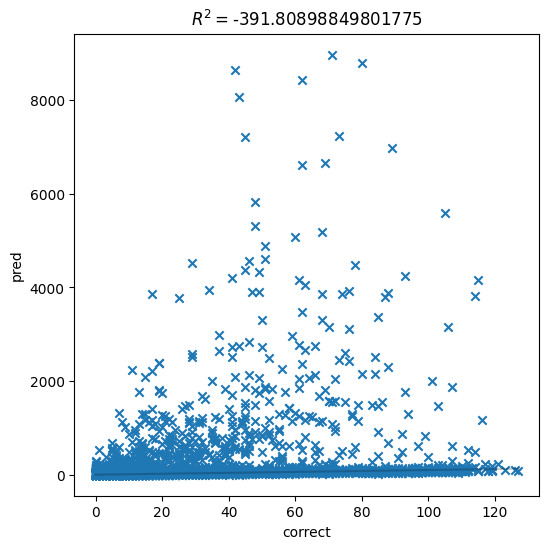

In [ ]:
#説明変数あり
train_pred = result.predict() #allは精度低,holiday_new単体が最も良い
test_pred = result.forecast(len(testY),exog = testX)
#test_pred_ci = result.get_forecast(len(testY),exog = testX).conf_int()
#対数変換を元に戻す
train_pred.iloc[:] = np.exp(train_pred.iloc[:]) - 1
test_pred.iloc[:] = np.exp(test_pred.iloc[:]) - 1
#test_pred_ci.iloc[:] = np.exp(test_pred_ci.iloc[:]) - 1

#説明変数なし
#test_pred = result.forecast(len(testY))
#test_pred_ci = result.get_forecast(len(testY)).conf_int()

train_rmse = np.sqrt(mean_squared_error(tra_df.customers, train_pred))
test_rmse = np.sqrt(mean_squared_error(eval_df.customers, test_pred))
print('RMSE(train):\t{:.5}\nRMSE(test):\t{:.5}'.format(train_rmse, test_rmse))

from sklearn.metrics import mean_absolute_error as mae
train_mae = mae(tra_df.customers, train_pred)
test_mae =mae(eval_df.customers, test_pred)
print('MAE(train):\t{:.5}\nMAE(test):\t{:.5}'.format(train_mae, test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(eval_df.customers, test_pred))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)

y_min, y_max = np.min(eval_df.customers), np.max(eval_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(eval_df.customers, test_pred, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

In [ ]:
ARMAX_log = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/ARMAX_log.csv",encoding='shift_jis')
ARMAX = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/ARMAX.csv",encoding='shift_jis')
span = 16*(30+31+30+31+31)
data = ARMAX_log[span:span+16*28]
data0 = eval_df.customers[span:span+16*28]
#data = ARMAX_log
#data0 = eval_df.customers
data = data.values.flatten()
test_mae =mae(data0, data)
print('MAE(test):\t{:.5}'.format(test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(data0, data))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(data0), np.max(data0)
plt.figure(figsize=(6, 6))
#plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(data0, data, marker="x")
plt.xlabel("実測値（人）",fontsize=15,fontname='IPAexGothic')
plt.ylabel("予測値（人）",fontsize=15,fontname='IPAexGothic')

In [ ]:
#予測結果を可視化
plt.subplots(figsize = (20,8))
y = eval_df.customers[(eval_df.index < "2022-3-1") & (eval_df.index >= "2022-2-1")]
length = len(eval_df[eval_df.index <= "2022-2-1"])#日付が早い方に合わせる
plot_test = data[length:len(y)+length]
sns.lineplot(y.index, y.values, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="ARMAX", linestyle="dotted", lw=2 , color="r")
plt.xlabel("日時（h）",fontsize=14,fontname='IPAexGothic')
plt.ylabel("来客数（人）",fontsize=14,fontname='IPAexGothic')
plt.legend()

RMSE(train):	11.522
RMSE(test):	904.94
MAE(train):	7.0339
MAE(test):	168.5
-1138.4546055473766


Text(0, 0.5, 'pred')

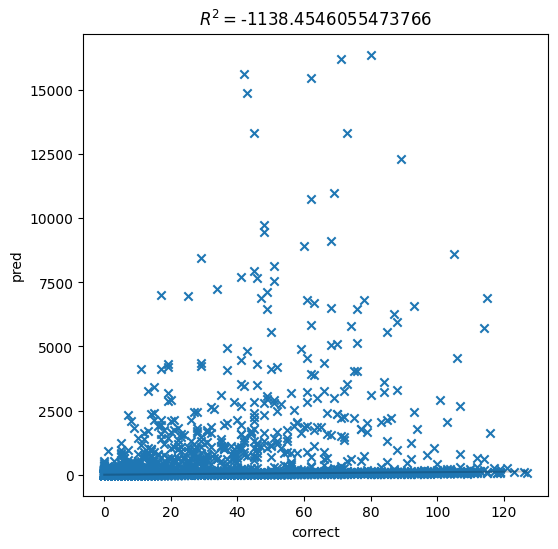

In [ ]:
x = eval_df.customers
y = test_pred
#x = eval_df.customers[16*31:16*62]
#y = test_pred[16*31:16*62]

train_rmse = np.sqrt(mean_squared_error(tra_df.customers, train_pred))
test_rmse = np.sqrt(mean_squared_error(x, y))
print('RMSE(train):\t{:.5}\nRMSE(test):\t{:.5}'.format(train_rmse, test_rmse))
train_mae = mae(tra_df.customers, train_pred)
test_mae =mae(x, y)
print('MAE(train):\t{:.5}\nMAE(test):\t{:.5}'.format(train_mae, test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(x, y))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(eval_df.customers), np.max(eval_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(x, y, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

In [ ]:
#予測結果を可視化（テストデータ）
plt.subplots(figsize = (30,10))
y = eval_df.customers[(eval_df.index < "2022-2-1") & (eval_df.index >= "2022-1-1")]
length = len(eval_df[eval_df.index <= "2022-1-1"])#日付が遅い方に合わせる
plot_test = test_pred[length:len(y)+length]
sns.lineplot(y.index, y.values,data = y, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="SARIMA", linestyle="dotted", lw=2 , color="r")
plt.legend()

In [ ]:
#予測結果を可視化(訓練データ)

plt.subplots(figsize = (30,10))

y = tra_df["customers"][(tra_df.index <= "2019-4-15") & (tra_df.index >= "2019-4-8")]
length = len(tra_df[tra_df.index <= "2019-4-8"])
plot_test = train_pred[length:len(y)+length]
sns.lineplot(y.index, y.values,data = y, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="SARIMA", linestyle="dotted", lw=2 , color="r")

plt.legend()

In [ ]:
#一部の評価
train_pred = result.predict()
test_pred = result.forecast(len(testY),exog = testX)

#対数変換を元に戻す
train_pred[:] = np.exp(train_pred[:]) - 1
test_pred[:] = np.exp(test_pred[:]) - 1
x = eval_df.customers[:16*200]
y = test_pred[:16*200]

train_rmse = np.sqrt(mean_squared_error(tra_df.customers, train_pred))
test_rmse = np.sqrt(mean_squared_error(x, y))
print('RMSE(train):\t{:.5}\nRMSE(test):\t{:.5}'.format(train_rmse, test_rmse))

#自由度調節済決定係数
#from sklearn.metrics import r2_score
#r2 = 1-(1 - r2_score(eval_df.customers, test_pred))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
#print(r2)
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(x, y))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(eval_df.customers), np.max(eval_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(x, y, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

In [ ]:
#white noise
plt.rc("figure",figsize=(20,10))
result.plot_diagnostics(lags=35);

(対数変換前)

降水量 RMSE(train):12.552 RMSE(test):15.189

感染者数倍率 RMSE(train):12.582 RMSE(test):15.59 R2:0.667

(対数変換後)

降水量 RMSE(train):11.919 RMSE(test):16.587 R2 : 0.623

感染者数倍率 RMSE(train):11.902 RMSE(test):	16.489 R2:0.627

##LightGBM

'objective': 'regression', 'metric': 'rmse', 'verbosity': -1, 'n_jobs': -1, 'feature_pre_filter': False, 'lambda_l1': 9.782383343362158, 'lambda_l2': 0.03053113989582535, 'num_leaves': 5, 'feature_fraction': 0.5, 'bagging_fraction': 0.8460759783008595, 'bagging_freq': 3, 'min_child_samples': 25}

r2_train: 0.9036
MAE_train: 0.3351
r2_valid: 0.7776
MAE_valid: 0.4579

MAE(test):	7.032
0.8371379503974831


Text(0, 0.5, '予測値（人）')

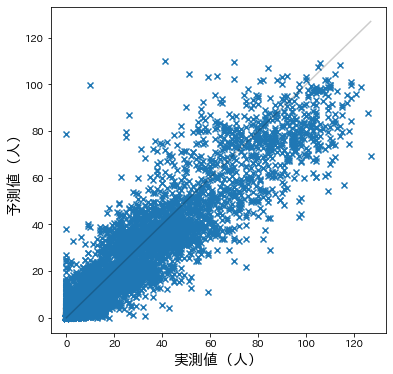

In [ ]:
LightGBM_log = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/LightGBM_log.csv",encoding='shift_jis')
LightGBM = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/LightGBM.csv",encoding='shift_jis')
#span = 16*(30+31+30+31+31)
#data = LightGBM_log[span:span+16*28]
#data0 = eval_df.customers[span:span+16*28]
data = LightGBM
data0 = eval_df.customers
data = data.values.flatten()
test_mae =mae(data0, data)
print('MAE(test):\t{:.5}'.format(test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(data0, data))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(data0), np.max(data0)
plt.figure(figsize=(6, 6))
#plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(data0, data, marker="x")
plt.xlabel("実測値（人）",fontsize=15,fontname='IPAexGothic')
plt.ylabel("予測値（人）",fontsize=15,fontname='IPAexGothic')

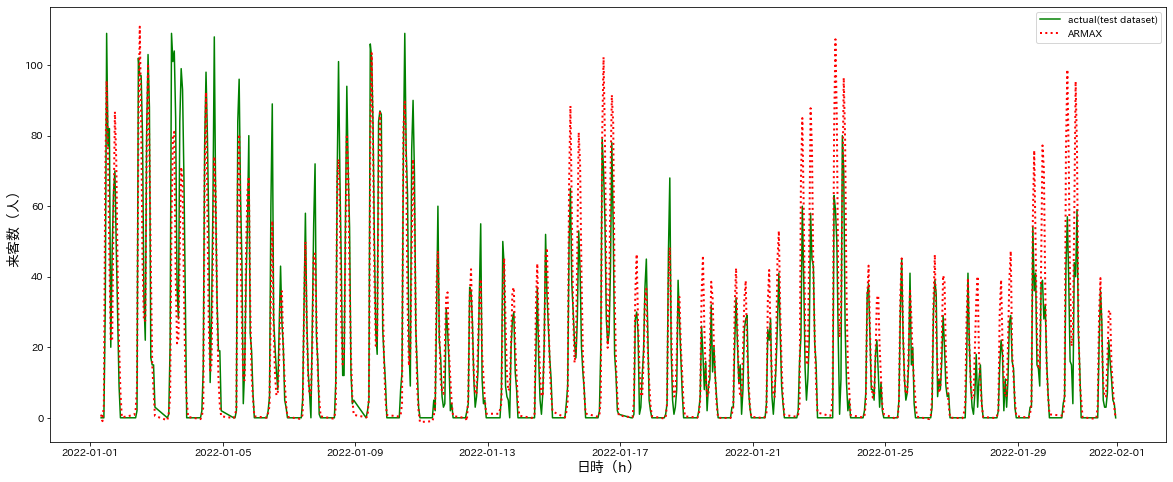

In [ ]:
#予測結果を可視化
plt.subplots(figsize = (20,8))
y = eval_df.customers[(eval_df.index < "2022-2-1") & (eval_df.index >= "2022-1-1")]
length = len(eval_df[eval_df.index <= "2022-1-1"])#日付が早い方に合わせる
plot_test = data[length:len(y)+length]
sns.lineplot(y.index, y.values, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="ARMAX", linestyle="dotted", lw=2 , color="r")
plt.xlabel("日時（h）",fontsize=14,fontname='IPAexGothic')
plt.ylabel("来客数（人）",fontsize=14,fontname='IPAexGothic')
plt.legend()

In [ ]:
trainY = tra_e.customers
trainX = tra_e.drop("customers", axis = 1)
testY = eval_e.customers
testX = eval_e.drop("customers",axis = 1)
import lightgbm as lgb
# データセットを生成する
lgb_train = lgb.Dataset(trainX, trainY)
params = {"objective": "regression"}
#LightGBMのハイパーパラメータ
#params = {"objective": "regression",'metric': 'rmse','verbosity': -1,'n_jobs': -1,'feature_pre_filter': False,
#          'lambda_l1': 9.782383343362158,'lambda_l2': 0.03053113989582535,'num_leaves': 5,
#          'feature_fraction': 0.5,'bagging_fraction': 0.8460759783008595, 'bagging_freq': 3,'min_child_samples': 25}

# 上記のパラメータでモデルを学習する
model = lgb.train(params, lgb_train)

In [ ]:
#各変数の重要度を出す場合
model.feature_importance()
#pandas DataFrameに出力
df_importance = pd.DataFrame(model.feature_importance(),index=trainX.columns,columns=['importance'])
print(df_importance)

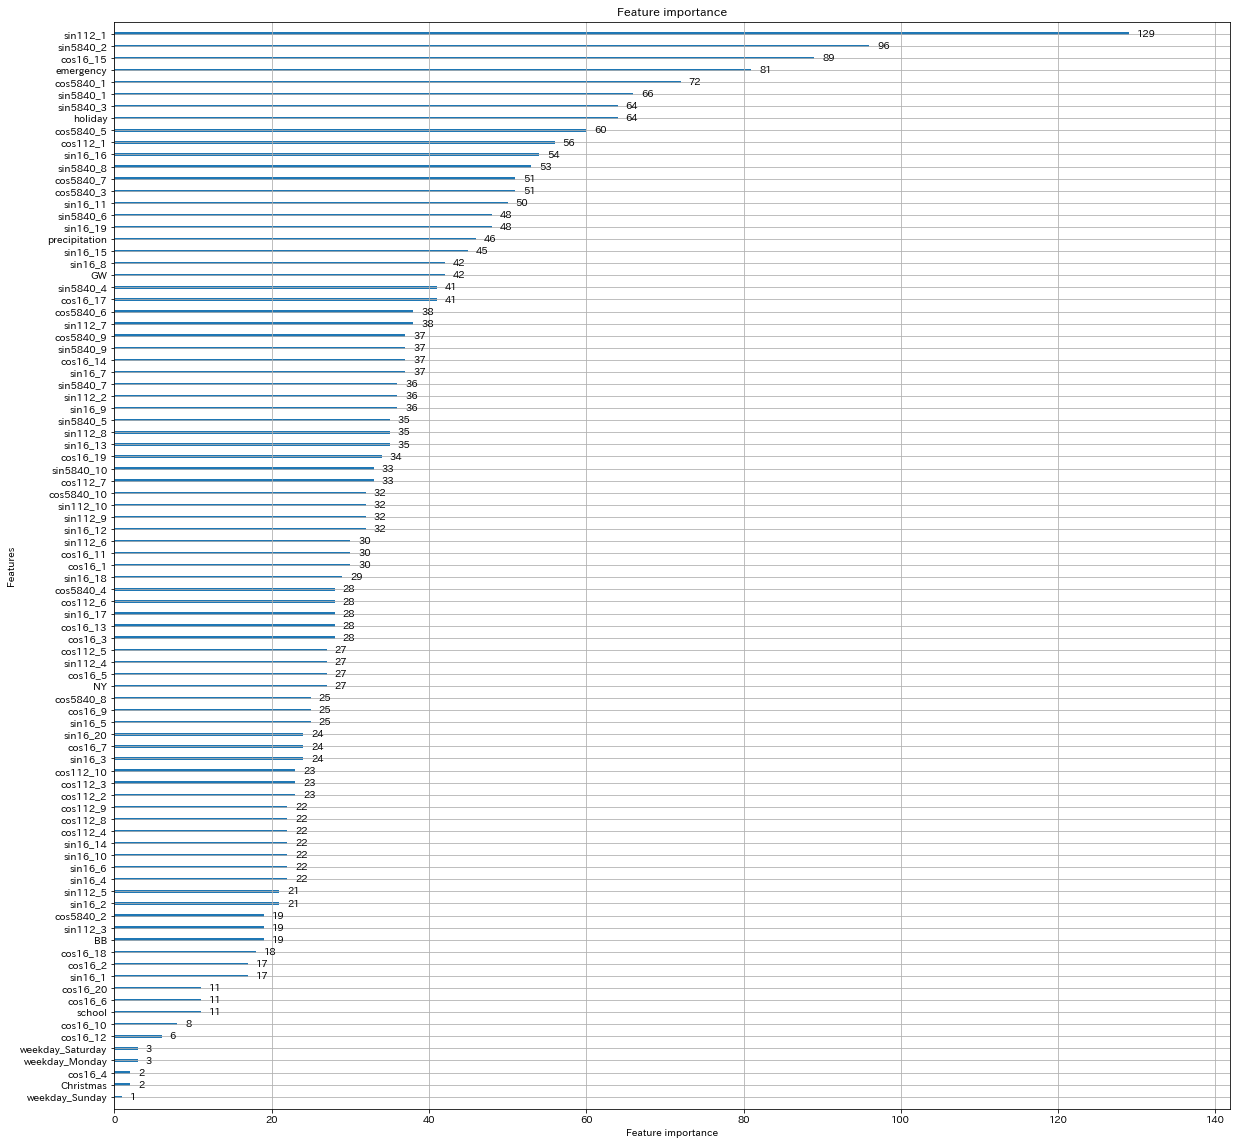

In [ ]:
lgb.plot_importance(model,figsize = (20,20))

RMSE(train):	9.1346
RMSE(test):	10.878
MAE(train):	5.6115
MAE(test):	7.1459
0.8338635001639804


Text(0, 0.5, 'pred')

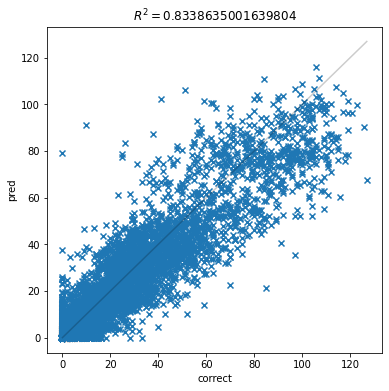

In [ ]:
train_pred = model.predict(trainX)
#説明変数あり
test_pred = model.predict(testX)
#対数変換を元に戻す
train_pred[:] = np.exp(train_pred[:]) - 1
test_pred[:] = np.exp(test_pred[:]) - 1
#説明変数なし
#test_pred = result.forecast(len(testY))

train_rmse = np.sqrt(mean_squared_error(tra_df.customers, train_pred))
test_rmse = np.sqrt(mean_squared_error(eval_df.customers, test_pred))
print('RMSE(train):\t{:.5}\nRMSE(test):\t{:.5}'.format(train_rmse, test_rmse))
train_mae = mae(tra_df.customers, train_pred)
test_mae =mae(eval_df.customers, test_pred)
print('MAE(train):\t{:.5}\nMAE(test):\t{:.5}'.format(train_mae, test_mae))

#自由度調節済決定係数
r2 = 1-(1 - r2_score(eval_df.customers, test_pred))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(eval_df.customers), np.max(eval_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(eval_df.customers, test_pred, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

In [ ]:
a = abs(test_pred - eval_df.customers)
#plt.ylim(0, 30)
plt.hist(a)
plt.show()

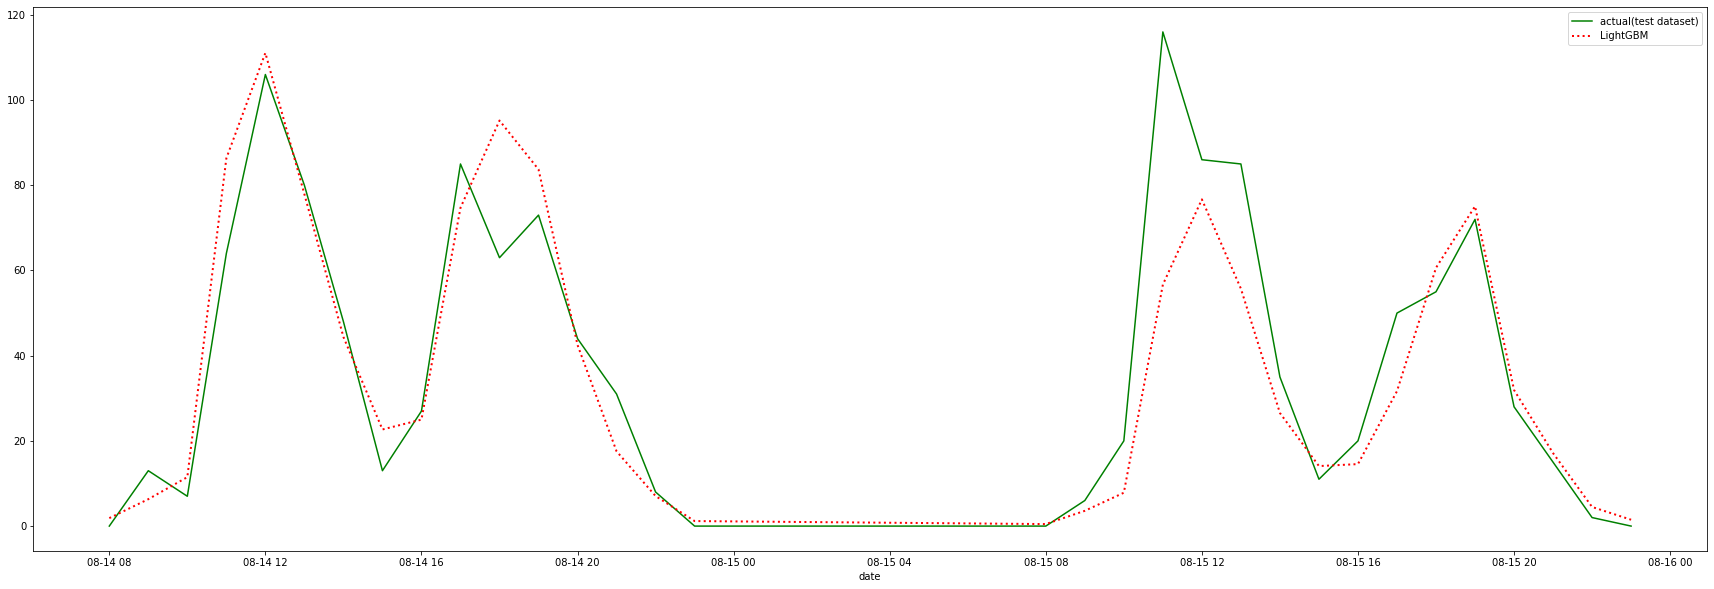

In [ ]:
#予測結果を可視化
plt.subplots(figsize = (30,10))
y = eval_df.customers[(eval_df.index < "2022-8-16") & (eval_df.index >= "2022-8-14")]
length = len(eval_df[eval_df.index <= "2022-8-14"])#日付が早い方に合わせる
plot_test = LightGBM_log[length:len(y)+length]
sns.lineplot(y.index, y.values, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="LightGBM", linestyle="dotted", lw=2 , color="r")
plt.legend()
#1月：正月後の土日が予測より来客が少なく，イベント後の一時的な需要低下が見られる
#春休みの期間来客数やんわり増加
#2022/3/24(謎の平日100人)
#2022/7/21-2022/8/24夏休み

In [ ]:
#一部の評価
train_pred = model.predict(trainX)
#説明変数あり
test_pred = model.predict(testX)
#対数変換を元に戻す
train_pred[:] = np.exp(train_pred[:]) - 1
test_pred[:] = np.exp(test_pred[:]) - 1
#tra_pre = pd.DataFrame(train_pred[:16*30])
tes_pre = pd.DataFrame(test_pred[:16*30])
#x = eval_df.customers[:16*31]
#y = test_pred[:16*31]      #+31+28+31+30+31+30+31
#x = eval_df.customers[16*(30+31+30+31):16*(30+31+30+31+31)]#+28+31+30+31+30+31+31)]
#y = test_pred[16*(30+31+30+31):16*(30+31+30+31+31)]#+28+31+30+31+30+31+31)]
#train_p = pd.concat([train_p,tra_pre], axis = 0)
test_p = pd.concat([test_p,tes_pre], axis = 0)

train_rmse = np.sqrt(mean_squared_error(tra_df.customers, train_pred))
test_rmse = np.sqrt(mean_squared_error(x, y))
print('RMSE(train):\t{:.5}\nRMSE(test):\t{:.5}'.format(train_rmse, test_rmse))
train_mae = mae(tra_df.customers, train_pred)
test_mae =mae(x, y)
print('MAE(train):\t{:.5}\nMAE(test):\t{:.5}'.format(train_mae, test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(x, y))*(len(x)-1) / (len(x) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(eval_df.customers), np.max(eval_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(x, y, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

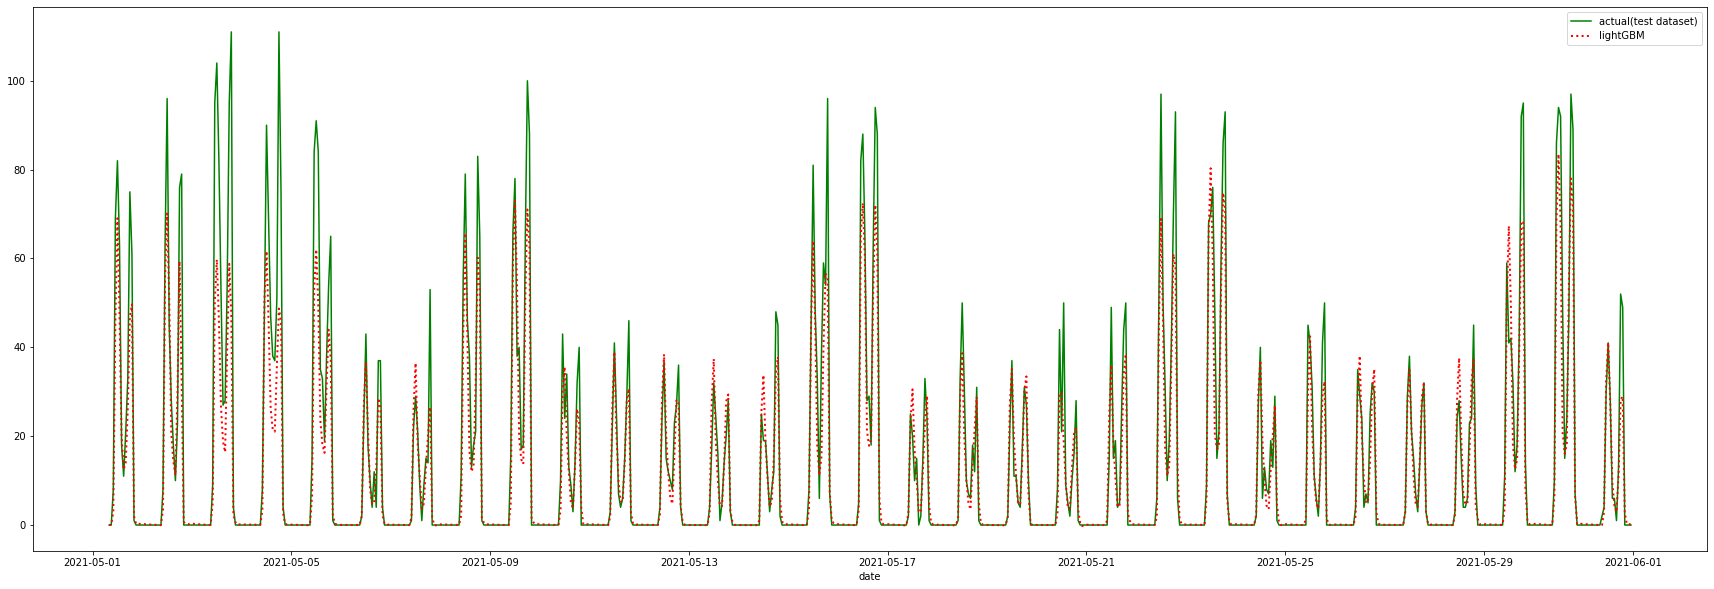

In [ ]:
#予測結果を可視化(訓練データ) 2019/8/15謎欠損あり
plt.subplots(figsize = (30,10))
y = tra_df["customers"][(tra_df.index < "2021-6-1") & (tra_df.index >= "2021-5-1")]
length = len(tra_df[tra_df.index <= "2021-5-1"]) #日付が早い方に合わせる
plot_test = train_pred[length:len(y)+length]
sns.lineplot(y.index, y.values,data = y, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="lightGBM", linestyle="dotted", lw=2 , color="r")
plt.legend()

In [ ]:
#自由度調節済決定係数(訓練データ)
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(tra_df.customers, train_pred))*(len(tra_df)-1) / (len(tra_df) - eval_df.shape[1] -1)
print(r2)

y_min, y_max = np.min(tra_df.customers), np.max(tra_df.customers)
plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(tra_df.customers, train_pred, marker="x")
plt.xlabel("correct")
plt.ylabel("pred")

In [ ]:
!pip install optuna

In [ ]:
#パラメータチューニング
dtrain = lgb.Dataset(trainX, trainY)
deval = lgb.Dataset(testX[:16*30], testY[:16*30],reference=dtrain)
best_params, history = {}, []
params = {'objective':'regression',
        'metric': 'mae',
        'verbosity':-1,
        'n_jobs':-1}
model = lgb.train(params, dtrain,
                    valid_sets=[dtrain, deval],
                    verbose_eval=True,
                    )

In [ ]:
#最適化したパラメータを表示する。
best_params = model.params
print(best_params)
# 予測精度を算出する
pred_trainY = model.predict(trainX)
pred_testY = model.predict(testX)
r2_train = r2_score(trainY,pred_trainY)
MAE_train = mae(trainY,pred_trainY)
r2_valid = r2_score(testY,pred_testY)
MAE_valid = mae(testY,pred_testY)
print('r2_train:',r2_train)
print('MAE_train:',MAE_train)
print('r2_valid:',r2_valid)
print('MAE_valid:',MAE_valid)

{'objective': 'regression', 'metric': 'mae', 'verbosity': -1, 'n_jobs': -1}
r2_train: 0.9345537050125551
MAE_train: 0.2810456621829293
r2_valid: 0.7733424512183074
MAE_valid: 0.44524170030396254


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# 最適パラメータを学習器にセット
model.set_params(**best_params)

# 学習曲線の取得
train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X, y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         fit_params=fit_params,
                                                         cv=cv, scoring=scoring, n_jobs=-1)
# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std
# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# 最高スコアの表示
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# 軸ラベルおよび凡例の指定
plt.xlabel('training examples')  # 学習サンプル数を横軸ラベルに
plt.ylabel(scoring)  # スコア名を縦軸ラベルに
plt.legend(loc='lower right')  # 凡例